In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as stats
import sklearn.metrics
from sklearn.linear_model import LinearRegression

# Evaluation (Linear) Regression Models

## Exercises

### Do you work for this exercise in a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.
***
2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
***
3. Plot the residuals for the linear regression model that you made.
***
4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
***
5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
***
6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
***
7. What is the amount of variance explained in your model?
***
8. Is your model better than the baseline model?
*** 
9. Create a file named evaluate.py that contains the following functions.

   - plot_residuals(y, yhat): creates a residual plot
   - regression_errors(y, yhat): returns the following values:
   - sum of squared errors (SSE)
   - explained sum of squares (ESS)
   - total sum of squares (TSS)
   - mean squared error (MSE)
   - root mean squared error (RMSE)
   - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
   - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
*** 
10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

1. Load the tips dataset from either pydataset or seaborn.

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [8]:
# generate parameters, create model and fit it. 
ols_model = LinearRegression().fit(tips[['total_bill']], tips.tip)
# make prediction 
tips['yhat'] = ols_model.predict(tips[['total_bill']])

In [16]:
actual = tips.tip
predicted = ols_model.predict(tips[['total_bill']])

In [9]:
# baseline prediction as the mean or median of tip 
tips['baseline'] = tips.tip.mean()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

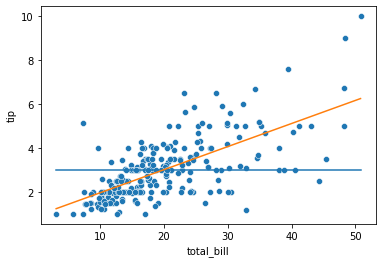

In [11]:
# tips.head()
# plot data with prediction line

sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

3. Plot the residuals for the linear regression model that you made.

"The residual of an observed value is the difference between the observed value and the estimated value. Another way to state this is that it is the vertical distance from the original data point to the expected data point (which shares an x and sits on the regression line)."

The residuals are the foundation for evaluating the effectiveness of a regression model.


In [17]:
# compute residuals
tips['residual'] = tips['tip'] - tips['yhat'] 
tips['residual_baseline'] = tips['tip'] - tips['baseline']

In [24]:
# compute residuals in textbook order
tips['residual2'] = tips['yhat'] - tips['tip']
tips['residual_baseline2'] = tips['baseline'] - tips['tip']

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,residual_baseline,residual2,residual_baseline2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721,-0.107178,-0.611721


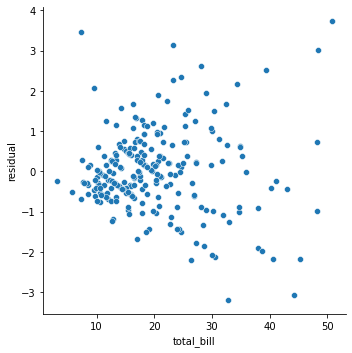

In [19]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips)

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

"__SSE__

Sometimes the Sum of the Squared Errors (SSE, a.k.a RSS, Residual Sum of Squares) will be used as the final metric to evaluate. Most times, however, this is used as a stepping stone to the other metrics, such as MSE and RMSE. If outliers matter, this is a good metric to use.

The value of the SSE is derived by simply squaring each of the errors computed in step one and summing them all together

In [31]:
# I'll do this using both the manual method as well as the scikitlearn approach
SSE = (tips.residual**2).sum()
print(f' The Sum of the Squared Errors of the Ordinary Least Squares model is \n {round(SSE, 3)}')

MSE = SSE/len(tips)
print(f' MSE: {MSE}')

# RMSE of OLS model
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
print(f' RMSE: {RMSE}')

# ESS = sum(tips.yhat - tips.tip.mean())**2

ESS = sum((tips.yhat - tips.baseline)**2)
print(f' ESS: {ESS}')

# Total Sum of Errors

TSS = ESS + SSE
print(f' TSS: {TSS}')

 The Sum of the Squared Errors of the Ordinary Least Squares model is 
 252.789
 MSE: 1.036019442011377
 RMSE: 1.0178504025697377
 ESS: 212.4237331984042
 TSS: 465.21247704918017


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

SSE2 = mean_squared_error(tips['tip'], tips['yhat'])*len(tips)
print(f' SSE: {SSE2}') 
MSE2 = mean_squared_error(tips.tip, tips.yhat)
print(f' MSE: {MSE2}') 
RMSE2 = sqrt(mean_squared_error(tips.tip, tips.yhat))
print(f' RMSE: {RMSE2}') 

 SSE: 252.788743850776
 MSE: 1.036019442011377
 RMSE: 1.0178504025697377


In [35]:
#SSE = (tips.residual2**2).sum()
#print(f' The Sum of the Squared Errors of the Ordinary Least Squares model is \n {round(SSE, 3)}')
#
#MSE = SSE/len(tips)
#print(MSE)

In [36]:
#from sklearn.metrics import mean_squared_error
#
#SSE2 = mean_squared_error(tips['yhat'], tips['tip'])*len(tips)
#print(SSE2) 
#
# after doing all this, I cannot see a reason why the order of the actual or predictor would
# matter when taking the difference. So I'll proceed as is. 

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [34]:
SSE_baseline = (tips.residual_baseline**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

#Mean squared error of baseline model:

MSE_baseline = SSE_baseline/len(tips)
print(f' MSE of baseline = {MSE_baseline}')

# RMSE for the baseline model
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)
print(f' RMSE of baseline = {RMSE_baseline}')

 The SSE of the baseline model is 465.2
 MSE of baseline = 1.906608512496641
 RMSE of baseline = 1.3807999538298954


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [44]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


7. What is the amount of variance explained in your model?

In [45]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

8. Is your model better than the baseline model?

In [46]:
# Most definitely. 

9. Create a file named evaluate.py that contains the following functions.

   - plot_residuals(y, yhat): creates a residual plot
   - regression_errors(y, yhat): returns the following values:
   - sum of squared errors (SSE)
   - explained sum of squares (ESS)
   - total sum of squares (TSS)
   - mean squared error (MSE)
   - root mean squared error (RMSE)
   - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
   - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [48]:
def plot_residuals(df, yhat, y):
    '''
    This function takes in a dataframe, the actual target variable 
    and model predictions then creates columns for residuals
    and baseline residuals. It returns a graph of both residual columns.
    '''

    # create a residual column
    df['residual'] = (yhat - y)

    # create a residual baseline column
    df['residual_baseline'] = (y.mean() - y)
    
    fig, ax = plt.subplots(figsize=(13,7))

    ax.hist(df.residual_baseline, label='baseline residuals', alpha=.6)
    ax.hist(df.residual, label='model residuals', alpha=.6)
    ax.legend()

    plt.show()

def regression_errors(df, yhat, y):
    '''
    
    '''
    
    SSE = mean_squared_error(yhat, y)*len(df)
    MSE = mean_squared_error(yhat, y)
    RMSE = sqrt(mean_squared_error(yhat, y))
    ESS = sum((yhat - y.mean())**2)
    TSS = sum((y - y.mean())**2)

    # compute explained variance
    R2 = ESS / TSS
    
    print('SSE is:', SSE)
    print('ESS is:', ESS)
    print('TSS is:', TSS)
    print('R2 is:', R2)
    print('MSE is:', MSE)
    print('RMSE is:', RMSE)
    
def baseline_mean_errors(y):
    yhat = y.mean()
    return {
        'sse': sse(yhat, y),
        'mse': mse(yhat, y),
        'rmse': rmse(yhat, y),
    }

def better_than_baseline(yhat, y):
    sse_baseline = sse(y, y.mean())
    sse_model = sse(yhat, y)
    return sse_model < sse_baseline

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.